INITIALIZE:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.interpolate as interpolate
import time

PARAMETERS/INITIAL ARRAYS:

In [4]:
t=1
tp=-0.237
tpp=0.138

k1=92
k2=92
Nexp=12
D=50

In [5]:
temparray=[0.0076628, 0.0086207, 0.0095785, 0.0105364 , 0.0114943, 0.0124521, 0.0134100, 0.0143678, 0.0153257, 0.0162835, 0.0172414, 0.0181992, 0.0191571, 0.0201149, 0.0210728, 0.0220307, 0.0229885, 0.0239464, 0.0249042, 0.0258621, 0.0268199, 0.0277778, 0.0287356, 0.0296935, 0.0306513, 0.0316092, 0.0325670, 0.0335349, 0.0344828, 0.0354406, 0.0363985, 0.0373563, 0.0383142, 0.0402299, 0.0421456, 0.0440613, 0.0459770, 0.0478927, 0.0498084, 0.0517241, 0.0536398, 0.0555556, 0.0574713, 0.0593870, 0.0613027, 0.0632184, 0.0651341, 0.0670498, 0.0689655, 0.0708812, 0.0727969, 0.0747126, 0.0766284]
tempnames=[('%.4f' %temp) for temp in temparray];

In [6]:
sizev=2**Nexp 
sizee=k1*k2
sizek=k1

krange=np.linspace(0,2*np.pi-(2*np.pi/sizek),sizek)
vrange=np.linspace(-D,D-((2*D)/sizev),sizev) 

finalk1=np.zeros(k1*k2*(2**Nexp)).tolist()
finalk2=np.zeros(k1*k2*(2**Nexp)).tolist()
finalv=np.zeros(k1*k2*(2**Nexp)).tolist()
for i in range(sizek):            
    for j in range(sizek):
        for k in range(sizev):  
            m=k+sizev*(j+sizek*i)      
            finalk1[m]=krange[i]
            finalk2[m]=krange[j]
            finalv[m]=vrange[k]



IMPORTS:

In [8]:
lists = []
with open('700Bdata.txt', 'r') as f:
    contents = f.read().split('\n---\n') 
    for list_section in contents:
        if list_section.strip():
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM700B = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM700B = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM700B = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM700B = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO700B = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE700B = [[arr[22:23] for arr in sublist] for sublist in lists]
mu700B = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [9]:
lists = []
with open('726Bdata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM726B = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM726B = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM726B = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM726B = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO726B = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE726B = [[arr[22:23] for arr in sublist] for sublist in lists]
mu726B = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [10]:
lists = []
with open('744Bdata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM744B = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM744B = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM744B = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM744B = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO744B = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE744B = [[arr[22:23] for arr in sublist] for sublist in lists]
mu744B = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [11]:
lists = []
with open('773Bdata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM773B = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM773B = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM773B = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM773B = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO773B = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE773B = [[arr[22:23] for arr in sublist] for sublist in lists]
mu773B = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [12]:
lists = []
with open('817Bdata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM817B = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM817B = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM817B = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM817B = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO817B = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE817B = [[arr[22:23] for arr in sublist] for sublist in lists]
mu817B = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [13]:
lists = []
with open('850Bdata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM850B = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM850B = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM850B = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM850B = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO850B = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE850B = [[arr[22:23] for arr in sublist] for sublist in lists]
mu850B = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists



MAKE POLYNOMIALS FROM IMPORT DATA:

In [15]:
# Polynomials were fit over a small range in the center of the frequency domain (where most of the spectral weight is concentrated)

omeganew=[finalv[int((2**12)*i+int((2**12-1)/2)-20):int((2**12)*i+int((2**12-1)/2)+23)] for i in range(k1*k2)]
k1new=[finalk1[int((2**12)*i+int((2**12-1)/2)-20):int((2**12)*i+int((2**12-1)/2)+23)] for i in range(k1*k2)]
k2new=[finalk2[int((2**12)*i+int((2**12-1)/2)-20):int((2**12)*i+int((2**12-1)/2)+23)] for i in range(k1*k2)]

# scaled for numerical stability, scaled back later
omegac=0.04
x=np.array(omeganew[0])/omegac

In [16]:
def p9(x, b, d, f, h, j): 
    return b*x + d*x**3 + f*x**5 + h*x**7 + j*x**9

def p10(x, c, e, g, i, n): 
    return (c*x**2 + e*x**4 + g*x**6 + i*x**8 + n*x**10)

def pwithe(x, a, c, e, g, n,m ): 
    return np.exp(-a*x**2)*(c*x**2 + e*x**4 + g*x**6 + n*x**8 + m*x**10)

In [17]:
start_time = time.time()
# should take a minute or two each

fitRHOSYM700B=[]
fitRHOASYM700B=[]
fitRESYM700B=[]
fitREASYM700B=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM700B[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM700B[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM700B[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM700B[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM700B.append(fitrhosym)
    fitRHOASYM700B.append(fitrhoasym)
    fitRESYM700B.append(fitresym)
    fitREASYM700B.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

62.18207287788391


In [18]:
start_time = time.time()

fitRHOSYM726B=[]
fitRHOASYM726B=[]
fitRESYM726B=[]
fitREASYM726B=[]

# .726 was not able to run quite as low as the others, so data on the second temperature
for i in range(len(temparray[1:])):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM726B[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM726B[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM726B[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM726B[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM726B.append(fitrhosym)
    fitRHOASYM726B.append(fitrhoasym)
    fitRESYM726B.append(fitresym)
    fitREASYM726B.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

53.036073207855225


In [19]:
start_time = time.time()

fitRHOSYM744B=[]
fitRHOASYM744B=[]
fitRESYM744B=[]
fitREASYM744B=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM744B[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM744B[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM744B[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM744B[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM744B.append(fitrhosym)
    fitRHOASYM744B.append(fitrhoasym)
    fitRESYM744B.append(fitresym)
    fitREASYM744B.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

62.3557915687561


In [20]:
start_time = time.time()

fitRHOSYM773B=[]
fitRHOASYM773B=[]
fitRESYM773B=[]
fitREASYM773B=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM773B[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM773B[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM773B[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM773B[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM773B.append(fitrhosym)
    fitRHOASYM773B.append(fitrhoasym)
    fitRESYM773B.append(fitresym)
    fitREASYM773B.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

56.91602444648743


In [21]:
start_time = time.time()

fitRHOSYM817B=[]
fitRHOASYM817B=[]
fitRESYM817B=[]
fitREASYM817B=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM817B[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM817B[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM817B[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM817B[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM817B.append(fitrhosym)
    fitRHOASYM817B.append(fitrhoasym)
    fitRESYM817B.append(fitresym)
    fitREASYM817B.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

56.24481964111328


In [22]:
start_time = time.time()

fitRHOSYM850B=[]
fitRHOASYM850B=[]
fitRESYM850B=[]
fitREASYM850B=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM850B[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM850B[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM850B[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM850B[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM850B.append(fitrhosym)
    fitRHOASYM850B.append(fitrhoasym)
    fitRESYM850B.append(fitresym)
    fitREASYM850B.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

58.85160732269287




VARIOUS FUNCTIONS AND COMPONENTS FOR RECONSTRUCTING SPECTRAL FUNCTIONS, RESISTIVITY:

In [24]:
def bandenergy(x, y, tp, tpp):
    return (-2*np.cos(x)-2*np.cos(y)-4*tp*np.cos(x)*np.cos(y)-2*tpp*(np.cos(2*x)+np.cos(2*y)))

bandenergyvec=np.vectorize(bandenergy)

In [25]:
bande=bandenergyvec(k1new,k2new,tp,tpp)
ve=omeganew-bande
veflat=np.concatenate(ve)

In [26]:
def depskx(kx,ky): 
    return 2*t*np.sin(kx) + 4*tp*np.sin(kx)*np.cos(ky) + 4*tpp*np.sin(2*kx)

ux = 1.0
uy = 0.0

def dF(x, tau): #derivative_Fermi_function_over_beta(x, tau):
    if x/tau <= -20.0:
        return 0.0;
    elif x/tau >= 20.0:
        return 0.0
    else:
        return -1.0/ (2.0 * np.cosh(x / (2.0 * tau)))**2
    
dFvec=np.vectorize(dF)
depsvec=np.vectorize(depskx)

In [27]:
def flatten(matrix):
    flat_list = []
    for row in matrix:
        flat_list += row
    return flat_list

In [28]:
flatRHOSYM700B=[]
flatRESYM700B=[]
flatRHOASYM700B=[]
flatREASYM700B=[]
for i in range(len(temparray)):
    flatRHOSYM700B.append(flatten(fitRHOSYM700B[i]))
    flatRHOASYM700B.append(flatten(fitRHOASYM700B[i]))
    flatRESYM700B.append(flatten(fitRESYM700B[i]))
    flatREASYM700B.append(flatten(fitREASYM700B[i]))

flatRHOSYM726B=[]
flatRESYM726B=[]
flatRHOASYM726B=[]
flatREASYM726B=[]
for i in range(len(temparray[1:])):
    flatRHOSYM726B.append(flatten(fitRHOSYM726B[i]))
    flatRHOASYM726B.append(flatten(fitRHOASYM726B[i]))
    flatRESYM726B.append(flatten(fitRESYM726B[i]))
    flatREASYM726B.append(flatten(fitREASYM726B[i]))

flatRHOSYM744B=[]
flatRESYM744B=[]
flatRHOASYM744B=[]
flatREASYM744B=[]
for i in range(len(temparray)):
    flatRHOSYM744B.append(flatten(fitRHOSYM744B[i]))
    flatRHOASYM744B.append(flatten(fitRHOASYM744B[i]))
    flatRESYM744B.append(flatten(fitRESYM744B[i]))
    flatREASYM744B.append(flatten(fitREASYM744B[i]))

flatRHOSYM773B=[]
flatRESYM773B=[]
flatRHOASYM773B=[]
flatREASYM773B=[]
for i in range(len(temparray)):
    flatRHOSYM773B.append(flatten(fitRHOSYM773B[i]))
    flatRHOASYM773B.append(flatten(fitRHOASYM773B[i]))
    flatRESYM773B.append(flatten(fitRESYM773B[i]))
    flatREASYM773B.append(flatten(fitREASYM773B[i]))

flatRHOSYM817B=[]
flatRESYM817B=[]
flatRHOASYM817B=[]
flatREASYM817B=[]
for i in range(len(temparray)):
    flatRHOSYM817B.append(flatten(fitRHOSYM817B[i]))
    flatRHOASYM817B.append(flatten(fitRHOASYM817B[i]))
    flatRESYM817B.append(flatten(fitRESYM817B[i]))
    flatREASYM817B.append(flatten(fitREASYM817B[i]))
    
flatRHOSYM850B=[]
flatRESYM850B=[]
flatRHOASYM850B=[]
flatREASYM850B=[]
for i in range(len(temparray)):
    flatRHOSYM850B.append(flatten(fitRHOSYM850B[i]))
    flatRHOASYM850B.append(flatten(fitRHOASYM850B[i]))
    flatRESYM850B.append(flatten(fitRESYM850B[i]))
    flatREASYM850B.append(flatten(fitREASYM850B[i]))    



SPECTRAL FUNCTIONS ρG:

In [30]:
start_time = time.time()

RHOG700B=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM700B[i],flatRESYM700B[i]),np.repeat(y0RE700B[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM700B[i],flatRHOSYM700B[i]),np.repeat(y0RHO700B[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu700B[i][0][0])),np.power(veflat+mu700B[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG700B.append(rhoG)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

7.107561826705933


In [31]:
RHOG726B=[]
for i in range(len(temparray[1:])):
    refcn=np.add(np.add(flatREASYM726B[i],flatRESYM726B[i]),np.repeat(y0RE726B[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM726B[i],flatRHOSYM726B[i]),np.repeat(y0RHO726B[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu726B[i][0][0])),np.power(veflat+mu726B[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG726B.append(rhoG)

In [32]:
RHOG744B=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM744B[i],flatRESYM744B[i]),np.repeat(y0RE744B[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM744B[i],flatRHOSYM744B[i]),np.repeat(y0RHO744B[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu744B[i][0][0])),np.power(veflat+mu744B[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG744B.append(rhoG)

In [33]:
RHOG773B=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM773B[i],flatRESYM773B[i]),np.repeat(y0RE773B[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM773B[i],flatRHOSYM773B[i]),np.repeat(y0RHO773B[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu773B[i][0][0])),np.power(veflat+mu773B[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG773B.append(rhoG)

In [34]:
RHOG817B=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM817B[i],flatRESYM817B[i]),np.repeat(y0RE817B[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM817B[i],flatRHOSYM817B[i]),np.repeat(y0RHO817B[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu817B[i][0][0])),np.power(veflat+mu817B[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG817B.append(rhoG)

In [35]:
RHOG850B=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM850B[i],flatRESYM850B[i]),np.repeat(y0RE850B[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM850B[i],flatRHOSYM850B[i]),np.repeat(y0RHO850B[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu850B[i][0][0])),np.power(veflat+mu850B[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG850B.append(rhoG)

In [36]:
omegaflat=flatten(omeganew)
k1flat=flatten(k1new)
k2flat=flatten(k2new)



RESISTIVITY FROM SPECTRAL FUNCTIONS:

In [38]:
start_time = time.time()

sigxx700B=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG700B[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1] # original spacing gets rid of the 0.04 and scales omega back
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx700B.append(sigxxfit)
rhoxx700B=np.divide(1,sigxx700B)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

118.54724264144897


In [39]:
sigxx726B=[]
for i in range(len(temparray[1:])):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG726B[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx726B.append(sigxxfit)
rhoxx726B=np.divide(1,sigxx726B)

In [40]:
sigxx744B=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG744B[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx744B.append(sigxxfit)
rhoxx744B=np.divide(1,sigxx744B)

In [41]:
sigxx773B=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG773B[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx773B.append(sigxxfit)
rhoxx773B=np.divide(1,sigxx773B)

In [42]:
sigxx817B=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG817B[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx817B.append(sigxxfit)
rhoxx817B=np.divide(1,sigxx817B)

In [43]:
sigxx850B=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG850B[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx850B.append(sigxxfit)
rhoxx850B=np.divide(1,sigxx850B)



EXAMPLE PLOTS:

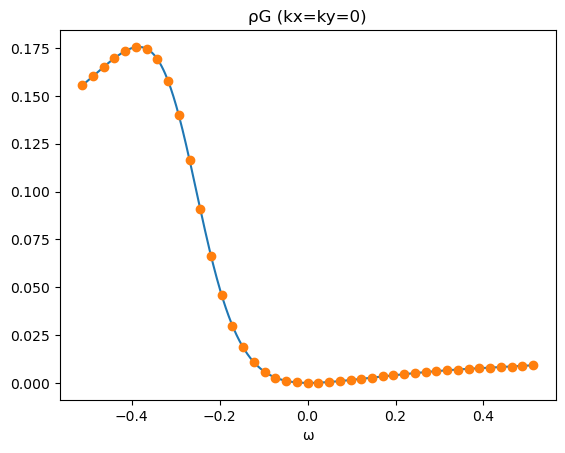

In [99]:
# spectral function data for the first (kx, ky) value in the n=0.726 data
# data is displayed with an interpolation

# first index in RHOG726B is temperature, inside that is a list of 92x92 sequential 43 point spectral functions
# The first of these, at kx=0 and ky=0, is shown below
# To find the kx and ky value for a point in RHOG726B you can check the same index in k1flat, k2flat

spl=interpolate.InterpolatedUnivariateSpline(omeganew[0],RHOG744B[0][0:43])
omega=np.linspace(omeganew[0][0],omeganew[0][-1],500)
plt.plot(omega,spl(omega))
plt.plot(omeganew[0],RHOG744B[0][0:43],'o')
plt.title("ρG (kx=ky=0)")
plt.xlabel("ω")
plt.show()

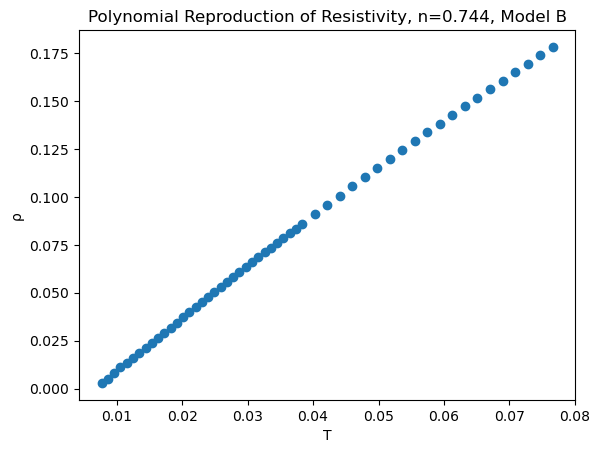

In [46]:
# one of the resistivity plots
# this is in dimensionless units, units we used can be found in the paper

plt.plot(temparray,rhoxx744B,'o')
plt.title("Polynomial Reproduction of Resistivity, n=0.744, Model B")
plt.ylabel("ρ")
plt.xlabel("T")
plt.show()

INTERPOLATION:

In [48]:
# an easy way to estimate resistivities at new densities from our results:

rhoarr=[rhoxx700B,rhoxx726B,rhoxx744B,rhoxx773B,rhoxx817B,rhoxx850B]
rhoarr=[rho.tolist() for rho in rhoarr]
densities=[0.700,0.726,0.744,0.773,0.817,0.850];

tvals=np.tile(temparray,len(densities)).tolist()
tvals=tvals[:53]+tvals[54:]                # cut out a point since 0.726 didn't work at lowest T
nvals=np.repeat(densities,len(temparray)).tolist()
nvals=nvals[:53]+nvals[54:]
rhovals=flatten(rhoarr)

X = np.linspace(min(tvals), max(tvals))
Y = np.linspace(min(nvals), max(nvals))
X, Y = np.meshgrid(X,Y)
interp = interpolate.LinearNDInterpolator(list(zip(tvals, nvals)), rhovals)
Z = interp(X, Y)


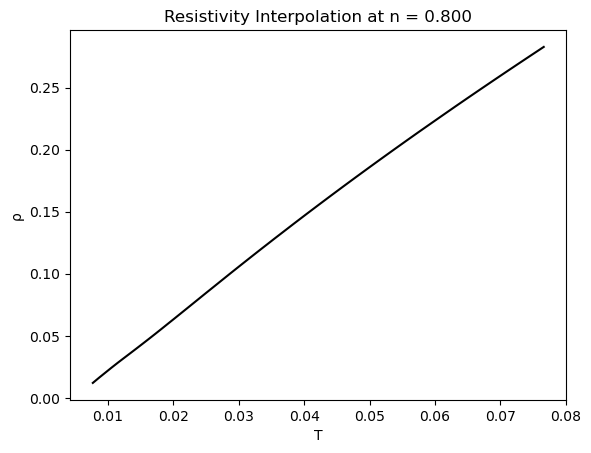

In [49]:
# demonstrating interpolation:

density=0.8

plt.plot(temparray,interp(temparray,density),'k-')
plt.title("Resistivity Interpolation at n = %1.3f" % density)
plt.ylabel("ρ")
plt.xlabel("T")
plt.show()